In [139]:
import pandas as pd
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Load the Data

In [135]:
file_path = r'C:\Users\lenovo\OneDrive\Desktop\familydata.xlsx'
data = pd.read_excel(file_path, sheet_name='FamilyData')
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


1 . DATA ANALYSIS

In [143]:
print(data.columns)

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')


In [148]:
data.columns = data.columns.str.strip()  # Removes leading/trailing spaces
data.columns = data.columns.str.lower()  # Converts to lowercase for consistency
data.columns # Verify the cleaned column names

Index(['family id', 'member id', 'transaction date', 'category', 'amount',
       'income', 'savings', 'monthly expenses', 'loan payments',
       'credit card spending', 'dependents', 'financial goals met (%)'],
      dtype='object')

Removing Duplicates

In [136]:
data_cleaned = data.drop_duplicates()
data_cleaned == data
data.head()

,Family ID,Member ID,Transaction Date,Category,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
0,FAM001,FAM001_Member1,2024-10-07,Travel,409.12,113810,20234,5781,2422,2959,2,68
1,FAM001,FAM001_Member1,2024-10-16,Travel,270.91,113810,20234,5781,2422,2959,2,68
2,FAM001,FAM001_Member1,2024-10-17,Groceries,91.10,113810,20234,5781,2422,2959,2,68
3,FAM001,FAM001_Member1,2024-10-25,Healthcare,198.23,113810,20234,5781,2422,2959,2,68
4,FAM001,FAM001_Member1,2024-10-25,Education,206.42,113810,20234,5781,2422,2959,2,68


Check missing values

In [137]:
missing_values = data_cleaned.isnull().sum()
missing_values.head(12)

Family ID                  0
Member ID                  0
Transaction Date           0
Category                   0
Amount                     0
Income                     0
Savings                    0
Monthly Expenses           0
Loan Payments              0
Credit Card Spending       0
Dependents                 0
Financial Goals Met (%)    0
dtype: int64

In [138]:
data.describe().round(3)

,Transaction Date,Amount,Income,Savings,Monthly Expenses,Loan Payments,Credit Card Spending,Dependents,Financial Goals Met (%)
count,16306,16306.000,16306.000,16306.000,16306.000,16306.000,16306.000,16306.000,16306.000
mean,2024-10-16 00:34:31.777259776,256.369,90340.504,24473.998,3948.522,2529.979,1782.881,3.202,59.418
min,2024-10-01 00:00:00,10.030,30851.000,1037.000,1013.000,3.000,510.000,0.000,21.000
25%,2024-10-08 00:00:00,134.820,59871.000,11016.000,2582.000,1390.000,1221.000,2.000,37.000
50%,2024-10-16 00:00:00,256.055,90142.000,25504.000,3721.000,2548.000,1705.000,3.000,58.000
75%,2024-10-24 00:00:00,379.240,119733.000,37422.000,5450.000,3724.000,2422.000,4.000,79.000
max,2024-10-31 00:00:00,499.910,149871.000,49217.000,6968.000,4974.000,2999.000,5.000,100.000
std,NaN,141.154,34740.834,14828.956,1689.988,1384.106,716.595,1.469,23.444


Family Level Spending Pattern

In [150]:
family_total_spending = data.groupby('family id')['amount'].sum().sort_values(ascending=False)

#Display result
print('\n Top 5 Families by total spendings')
family_total_spending.head()


 Top 5 Families by total spendings


family id
FAM050    43880.14
FAM194    41655.65
FAM005    40246.21
FAM187    40052.84
FAM081    37314.40
Name: amount, dtype: float64

Member Level Spending Pattern

In [151]:
member_level_spending = data.groupby('member id')['amount'].sum().sort_values(ascending=False)

#Display Results
print('\n Top 5 Members by total Spendings')
member_level_spending.head()
      


 Top 5 Members by total Spendings


member id
FAM133_Member4    9509.20
FAM050_Member1    8773.50
FAM120_Member2    8728.50
FAM158_Member2    8695.13
FAM176_Member4    8640.37
Name: amount, dtype: float64

Correlation between Financial Metrics

In [21]:
print(data.columns)

Index(['Family ID', 'Member ID', 'Transaction Date', 'Category', 'Amount',
       'Income', 'Savings', 'Monthly Expenses', 'Loan Payments',
       'Credit Card Spending', 'Dependents', 'Financial Goals Met (%)'],
      dtype='object')


In [ ]:
financial_data = data[['income', 'monthly expenses', 'savings', 'credit card spending']] #Load relevant Financial metrics
correlation_matrix = financial_data.corr() #Calculate Correlation 
correlation_matrix

,income,monthly expenses,savings,credit card spending
income,1.000000,-0.041355,-0.108340,-0.123225
monthly expenses,-0.041355,1.000000,-0.082094,-0.046059
savings,-0.108340,-0.082094,1.000000,0.022499
credit card spending,-0.123225,-0.046059,0.022499,1.000000


Visualize the correlation matrix as a Heatmap

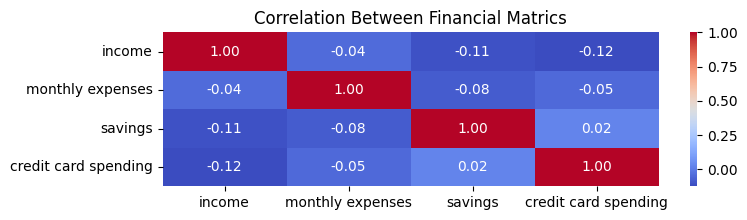

In [35]:
plt.figure(figsize=(8, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Financial Matrics')
plt.show()

2 . BUILD A FINANCIAL SCORE MODEL

In [ ]:
#Normalize key metrics

data['savings_to_income_ratio'] = data['savings'] / data['income']
data['expenses_to_income_ratio'] = data['monthly expenses'] / data['income']
data['loan_to_income_ratio'] = data['loan payments'] / data['income']
data['credit_card_to_income_ratio'] = data['credit card spending'] / data['income']
data['discretionary_spending_ratio'] = data['amount'] / data['income']  
data['financial_goals_met_ratio'] = data['financial goals met (%)'] / 100

# Assign weights to each factor

weights = {
    'savings_to_income_ratio': 0.2,
    'expenses_to_income_ratio': 0.2,
    'loan_to_income_ratio': 0.15,
    'credit_card_to_income_ratio': 0.15,
    'discretionary_spending_ratio': 0.2,
    'financial_goals_met_ratio': 0.1
}

# Calculate financial health score

data['financial_health_score'] = (
    data['savings_to_income_ratio'] * weights['savings_to_income_ratio'] +
    (1 - data['expenses_to_income_ratio']) * weights['expenses_to_income_ratio'] +
    (1 - data['loan_to_income_ratio']) * weights['loan_to_income_ratio'] +
    (1 - data['credit_card_to_income_ratio']) * weights['credit_card_to_income_ratio'] +
    (1 - data['discretionary_spending_ratio']) * weights['discretionary_spending_ratio'] +
    data['financial_goals_met_ratio'] * weights['financial_goals_met_ratio']
) * 100  # Scale to 0–100

# Display scores
data[['family id', 'financial_health_score']]


,family id,financial_health_score
0,FAM001,78.558744
1,FAM001,78.583031
2,FAM001,78.614630
3,FAM001,78.595804
4,FAM001,78.594364
...,...,...
16301,FAM200,95.214549
16302,FAM200,95.148033
16303,FAM200,95.134479
16304,FAM200,95.040878


3 . INSIGHTS VISUALIZATION

3.1 Spending distribution across categories

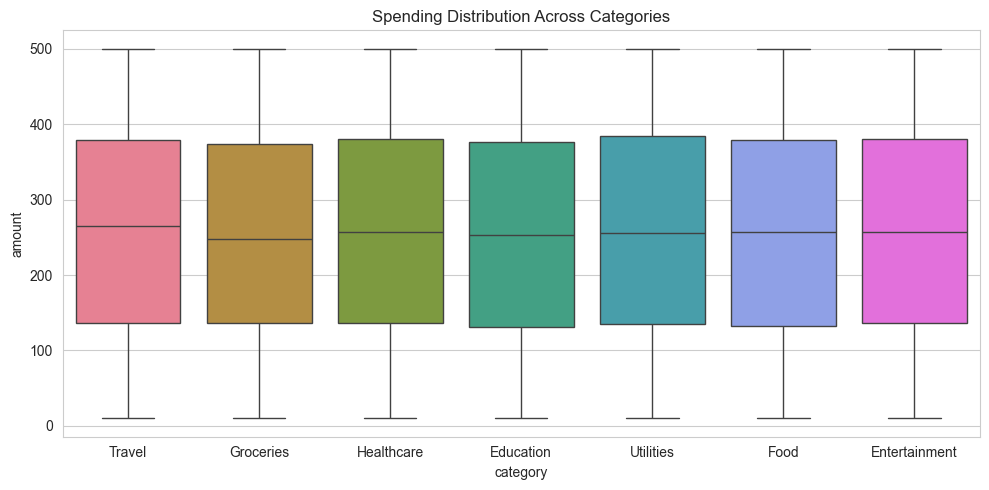

In [83]:
plt.figure(figsize=(10, 5))
spending_data = data[['family id', 'category', 'amount']]
plt.title('Spending Distribution Across Categories')
sns.boxplot(x='category', y='amount', data=spending_data, hue='category', palette='husl')
plt.tight_layout()
plt.show()

3.2 Family wise financial score.

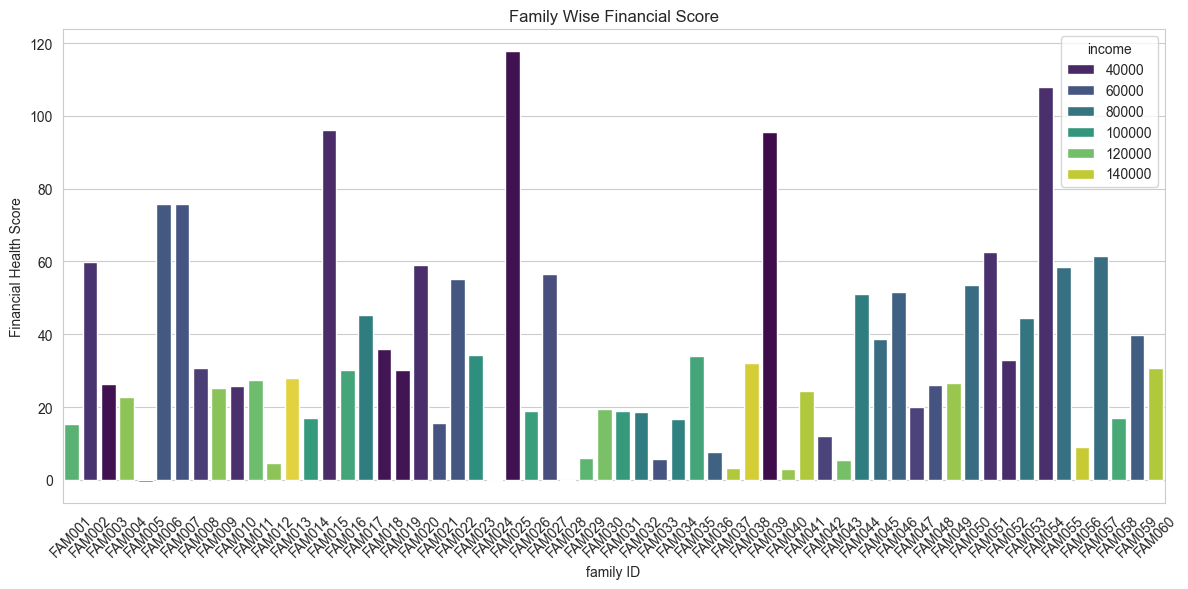

In [117]:
#Calculate the financial health score
#formula : financial health score = (savings/income)*100 - (expenses/income)*50 

data['financial_health_score'] = (data['savings'] / data['income']) * 100 - (data['monthly expenses'] / data['income']) * 50

#plot the financial health score
data_subset = data.head(5000)
plt.figure(figsize=(12, 6))
sns.barplot(x='family id', y='financial_health_score', data=data_subset, hue='income', palette='viridis')
plt.title('Family Wise Financial Score')
plt.xlabel('family ID')
plt.ylabel('Financial Health Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3.3 Member wise spending trends.

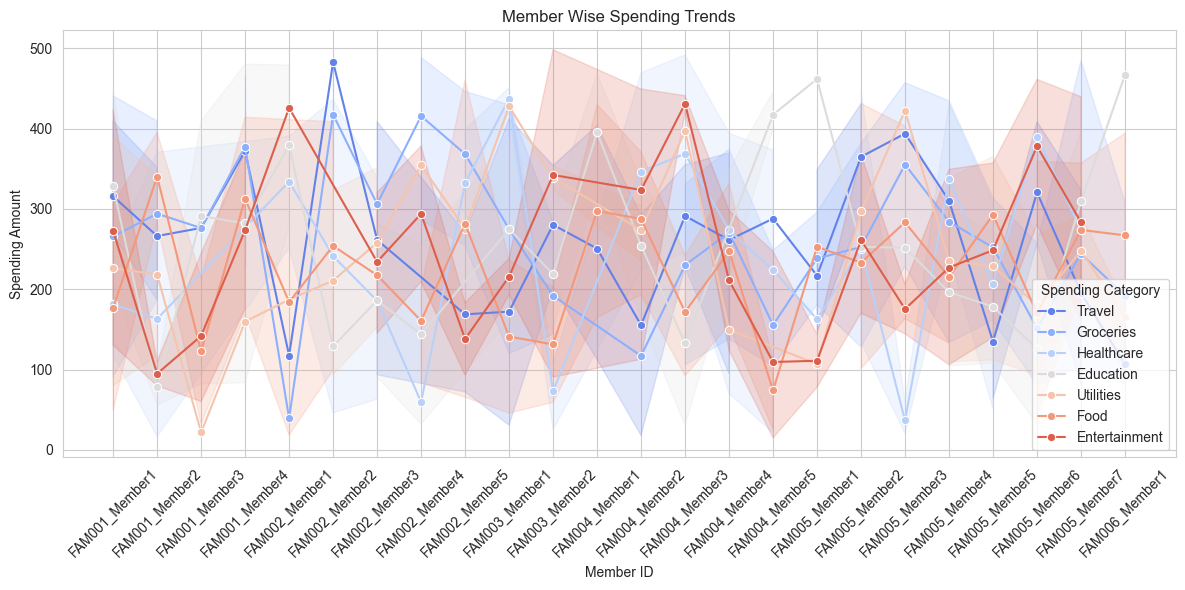

In [ ]:
data_subset = data.head(500)
#Create a Lineplot

plt.figure(figsize=(12,6))
sns.lineplot(x='member id', y='amount',hue='category', data=data_subset, marker='o', palette='coolwarm')
plt.title('Member Wise Spending Trends')
plt.xlabel('Member ID')
plt.ylabel('Spending Amount')
plt.legend(title='Spending Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()